# Imports

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

from sklearn import svm, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

The first part of the work is creating a Support Vector Machine (SVM) that will work with Social Network advertisements. To work with the data will be used the Pandas module and for plotting the data will be used Seaborn module with Matplotlib module.

# Social Network Ads analysis

In [75]:
sn_ads_df = pd.read_csv(os.getcwd() + '\Social_Network_Ads.csv')
sn_ads_df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

Conform presented information there are 3 data columns. The ```Age``` column represents age of a person, the ```Estimated Salary``` covers person's income in USD dollars, the ```Purchased``` status shows if person purchased object shown in the ads. The 0 value represents *not purchased* and the 1 value represents *purchased* status.

In [76]:
print('amount of unique age records = ' + str(len(sn_ads_df.Age.unique())))
print('amount of unique salary records = ' + str(len(sn_ads_df.EstimatedSalary.unique())))
print('amount of present statuses = ' + str(len(sn_ads_df.Purchased.unique())))

amount of unique age records = 43
amount of unique salary records = 117
amount of present statuses = 2


In [77]:
sn_ads_df.Purchased.replace(0, 'Not purchased', inplace=True)
sn_ads_df.Purchased.replace(1, 'Purchased', inplace=True)


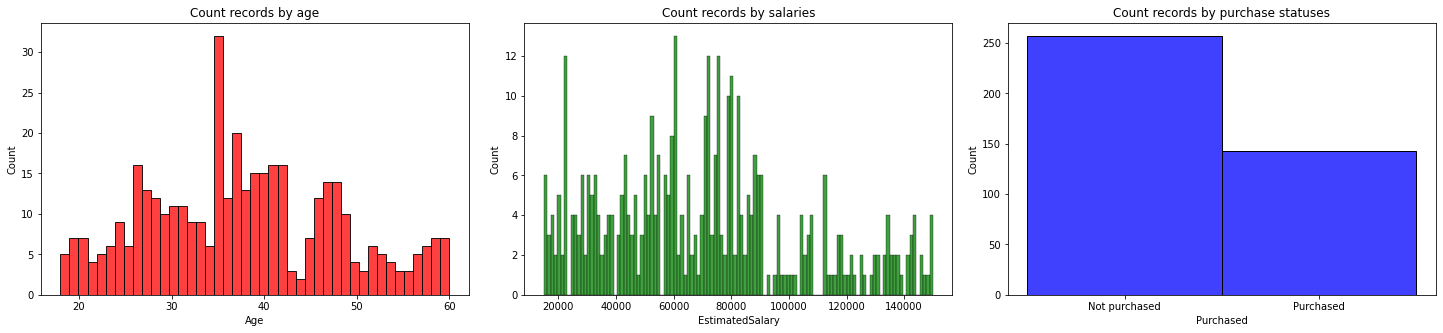

In [78]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=sn_ads_df, x='Age', color='r', bins=43).set_title('Count records by age')
plt.subplot(1, 3, 2)
sns.histplot(data=sn_ads_df, x='EstimatedSalary', color='g', bins=117).set_title('Count records by salaries')
plt.subplot(1, 3, 3)
sns.histplot(data=sn_ads_df, x='Purchased', color='b', bins=2).set_title('Count records by purchase statuses')

plt.subplots_adjust(hspace=0.2, wspace=0.13)
plt.show()

Conform presented information can be seen that most of the records are represented by persons between **35-42 years**, most of the people have **salaries less than 90,000 USD** and most of the records are representing people that **do not purchased ads subject**.

<Figure size 720x720 with 0 Axes>

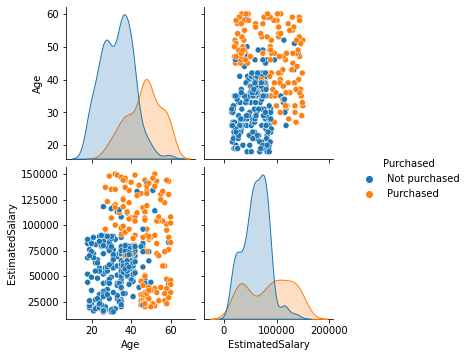

In [79]:
plt.figure(figsize=(10, 10))
sns.pairplot(sn_ads_df, hue='Purchased')
plt.show()

Conform presented charts most of people that do not purchased ads subject are people with smaller age and smaller salaries. There is a small amount of outliers present in the distributions meaning that models should show good results.

In [80]:
sn_ads_df.Purchased.replace('Not purchased', 0, inplace=True)
sn_ads_df.Purchased.replace('Purchased', 1, inplace=True)
sn_ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


The first matrix represents information of Age and Salary data while the second one is representing answers if person purchased or not ads subject. In order to perform efficient SVM model training and predictions it is required to perform data standardization. Another important moment: *results can not be interpreted correctly if results are not numerical and therefore it is required to transform categorical answers back into numerical for SVM model*.

In [81]:
training_matrix = np.array(sn_ads_df[['Age', 'EstimatedSalary']])
answers_matrix = np.array(sn_ads_df.Purchased)

In [82]:
standard_scaler = StandardScaler()
training_matrix = standard_scaler.fit_transform(training_matrix)

In the cell below is performed split of the data on input and output values.

In [83]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, answers_matrix, 
                                                                    test_size=0.2, random_state=0)

svm_classificator = svm.SVC(kernel='linear')
svm_classificator.fit(x_train, y_train)
predictions = svm_classificator.predict(x_test)

In [84]:
for index in range(0, len(predictions)):
    print('real answer = ' + str(y_test[index]) + ', prediction = ' + str(predictions[index]))

real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 1, prediction = 1
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 1, prediction = 1
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 1, prediction = 1
real answer = 0, prediction = 0
real answer = 1, prediction = 1
real answer = 0, prediction = 0
real answer = 1, prediction = 1
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real answer = 0, prediction = 0
real ans

C:\Users\Zbook\AppData\Local\Temp/ipykernel_21288/3285697989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['predictions'] = predictions


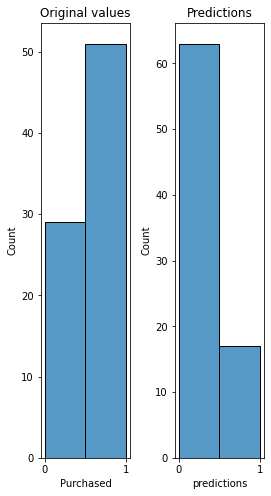

In [85]:
comparison_df = sn_ads_df.tail(80)
comparison_df['predictions'] = predictions

plt.figure(figsize=(4, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=comparison_df, x='Purchased', bins=2).set_title('Original values')
plt.subplot(1, 2, 2)
sns.histplot(data=comparison_df, x='predictions', bins=2).set_title('Predictions')

plt.subplots_adjust(wspace=0.5)
plt.show()

Conform presented distribution there is a mismatch of false negative values. This is caused by a bigger amount of negative values present in the original distribution.

In [86]:
print("Test accuracy:", np.round(accuracy_score(comparison_df.Purchased, predictions), 2))
confusion_matrix(comparison_df.Purchased, comparison_df.predictions)

Test accuracy: 0.42


array([[23,  6],
       [40, 11]], dtype=int64)

The confusion matrix represents table with next structure:

```
         |  Positive       | Negative        |
----------------------------------------------
Positive | true positives  | false positives |
Negative | false negatives | true negatives  |
----------------------------------------------
```

Columns represent actual values while rows are representing predicted values and all matches are covered in the True Positives and True Negatives sections. Conform table presented above can be seen that there are 23 true positives and 11 true negatives, meaning that 34 records were predicted correctly. Another moment is that there are 40 false negatives and 6 false positives, meaning that there are 46 incorrect predictions. It matches with the resuts presented previously, considering that there are more negative values than required.

In order to raise efficiency of the algorithm it is required to find more data and check better for outliers. Model efficiency can be estimated by either appllying precision or recall metrics using next two formulas:

```
                TP                           TP
Precision = ---------;           Recall = ---------;  
             TP + FP                       TP + FN
```

Conform presented formulas current model metrics values are:

```
                TP         23                              TP         23
Precision = --------- = -------- = 0.793;     Recall = --------- = --------- = 0.365;  
             TP + FP     23 + 6                         TP + FN     23 + 40
```

Presented model has better precision that recall. To define if model is efficient one it is required to find F1-Score:

```
                      2                      2                 2
F1-score = ----------------------- = ----------------- = -------------- = 0.5
              1            1            1         1       2.74 + 1.261
           -------- + -----------    ------- + -------
            Recall     Precision      0.365     0.793
```

Basic model accuracy is equal to 0.42

In [87]:
scores = cross_val_score(svm_classificator, training_matrix, answers_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores

0.82 accuracy with a standard deviation of 0.12


array([0.675, 0.675, 0.975, 0.95 , 1.   , 0.875, 0.8  , 0.775, 0.8  ,
       0.675])

## Performing grid search for support vector machine

In [88]:
param_grid = [{'C': [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1], 'kernel': ['linear', 'rbf']}]
grid_search = GridSearchCV(svm_classificator, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-2, cv=10)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-2,
             param_grid=[{'C': [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [89]:
best_predictions = grid_search.best_estimator_.predict(x_test)
print("Test accuracy:", np.round(accuracy_score(comparison_df.Purchased, best_predictions), 2))
cf_matrix = confusion_matrix(comparison_df.Purchased, best_predictions)
print(cf_matrix)
print(grid_search.best_params_)

Test accuracy: 0.46


array([[21,  8],
       [35, 16]], dtype=int64)

After performing grid search of the data was found the best estimator. In order to make sure that model was enhanced it is required to recalculate metrics.

```
                TP         21                              TP          21
Precision = --------- = --------- = 0.724;     Recall = --------- = --------- = 0.375;  
             TP + FP     21 + 8                          TP + FN     21 + 35
```

```
                      2                      2               2
F1-score = ---------------------- = ----------------- = ------------ = 0.494
              1            1           1         1      2.67 + 1.381
           -------- + -----------   ------- + -------
            Recall     Precision     0.375     0.724
```

Conform presented results the precision of the model had a small decrease and model recall had a small increase. Accuracy of the model had small increase. The F1-score has even smaller decrease. Conform presented metrics can be considered that model has been enhanced.

Classification results present in the current chapter using Support Vector Machine are promising, considering that they can be enhanced by performing analysis over bigger dataset and bigger amount of positive records in order to make algorithm understand better connection between variables and outcome. In the next chapter will be performed classification using 6 classification models:
*  Logistic Regression
*  Decision Tree Classifier
*  Random Forest Classifier (with 10 trees)
*  K-nearest neighbors (KNN)
*  Naive Bayes
*  Support Vector Machine

Laboratory work requirements define need ot using all the steps until Grid Search, but considering need to efficiently compare algorithms it is required to perform even basic grid search.

# Comparing different classification algorithms

In [90]:
tumor_df = pd.read_csv(os.getcwd() + '\data1.csv')
tumor_df

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
678                         1                  1                            3   
679                         1                  1                            2   
680                        10                  3                            7   
681                         6                  4                            3   
682                         8                  5                            4   

     Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0              1                3                1        1      2  
1             10                3                2        1      2  
2              2                3                1        1      2  
3              4                3                7        1      2  
4              1                3                1        1      2  
..           ...              ...              ...      ...    ...  
678            2                1                1        1      2  
679            1                1                1        1      2  
680            3                8               10        2      4  
681            4               10                6        1      4  
682            5               10                4        1      4  

[683 rows x 11 columns]

In [91]:
print('unique outcomes = ' + str(tumor_df.Class.unique()))
print('amount of unique sample code numbers = ' + str(len(tumor_df['Sample code number'].unique())))
print('amount of unique clump thickness values = ' + str(len(tumor_df['Clump Thickness'])))
print('amount of unique uniformity of cell shape values = ' + str(len(tumor_df['Uniformity of Cell Shape'])))
print('amount of unique marginal adhesion values = ' + str(len(tumor_df['Marginal Adhesion'])))
print('amount of unique single epitherial cell sizes = ' + str(len(tumor_df['Single Epithelial Cell Size'])))
print('amount of unique bare nuclei values = ' + str(len(tumor_df['Bare Nuclei'])))
print('amount of unique bland chromatin values = ' + str(len(tumor_df['Bland Chromatin'])))
print('amount of unique normal nucleoli values = ' + str(len(tumor_df['Normal Nucleoli'])))
print('amount of unique mitoses values = ' + str(len(tumor_df['Mitoses'])))

unique outcomes = [2 4]
amount of unique sample code numbers = 630
amount of unique clump thickness values = 683
amount of unique uniformity of cell shape values = 683
amount of unique marginal adhesion values = 683
amount of unique single epitherial cell sizes = 683
amount of unique bare nuclei values = 683
amount of unique bland chromatin values = 683
amount of unique normal nucleoli values = 683
amount of unique mitoses values = 683


In [92]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


As it is described in the laboratory work requirements the ```Class``` variable represents outcome of the classification. Conform presented unique values it is required to perform categorization of the ```Class``` columns, meaning transforming value 2 into *tumor* and 4 into *malign*

In [93]:
tumor_df.Class.replace(4, 'malign', inplace=True)
tumor_df.Class.replace(2, 'tumor', inplace=True)
tumor_df

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
678                         1                  1                            3   
679                         1                  1                            2   
680                        10                  3                            7   
681                         6                  4                            3   
682                         8                  5                            4   

     Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses   Class  
0              1                3                1        1   tumor  
1             10                3                2        1   tumor  
2              2                3                1        1   tumor  
3              4                3                7        1   tumor  
4              1                3                1        1   tumor  
..           ...              ...              ...      ...     ...  
678            2                1                1        1   tumor  
679            1                1                1        1   tumor  
680            3                8               10        2  malign  
681            4               10                6        1  malign  
682            5               10                4        1  malign  

[683 rows x 11 columns]

In [94]:
numerical_columns = ['Clump Thickness', 'Uniformity of Cell Shape', 
                     'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
                     'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

outcome_column = ['Class']

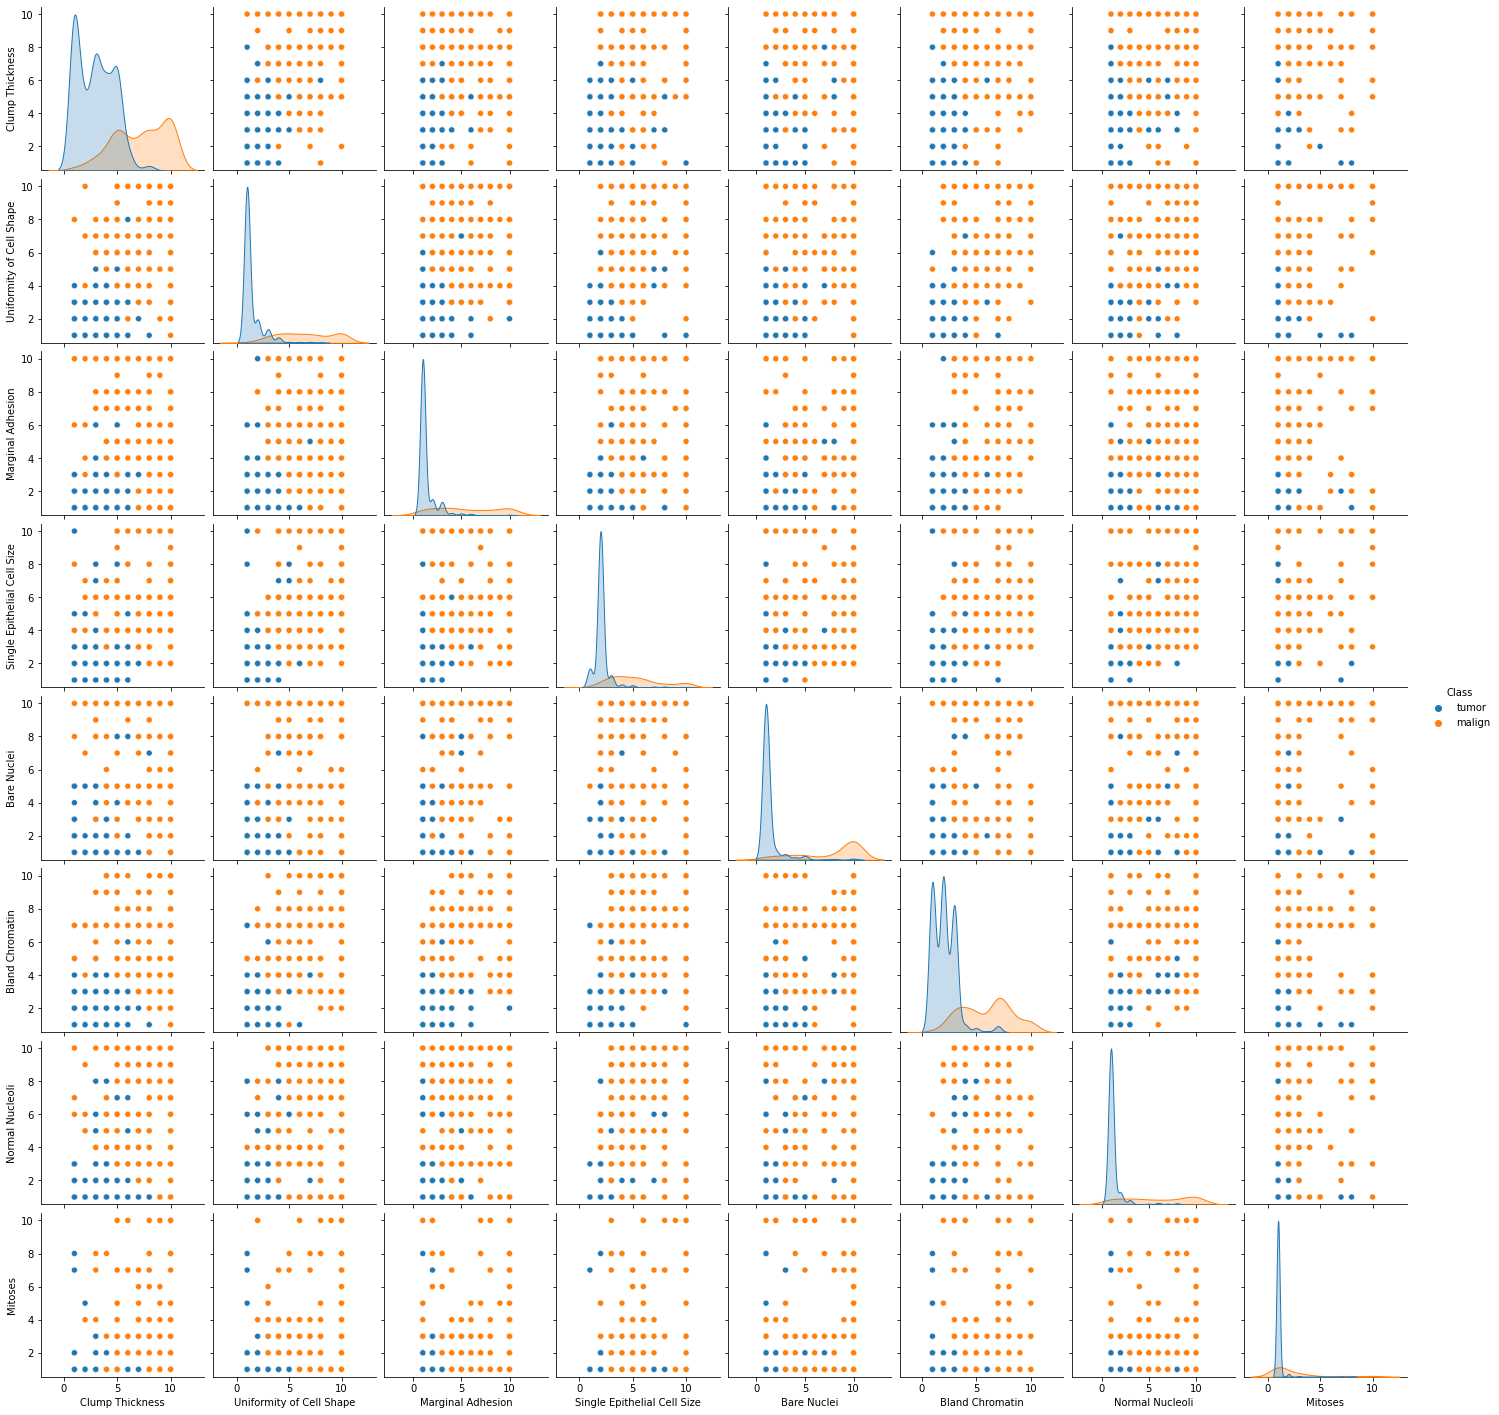

In [95]:
sns.pairplot(tumor_df[numerical_columns + outcome_column], hue='Class')

Conform presented Seaborn pairplots charts can be seen that scatterplots demonstrate that ```malign``` class is represented by lower-left values and ```tumor``` class is represented by the upper-right points. It means that lower values are matching with the ```malign``` class and bigger values are matching with ```tumor``` class.

Points in the distributions have small amount of outliers meaning that there could be deviations in predictions compared to the real values.

In [96]:
tumor_df.Class.replace('malign', 4, inplace=True)
tumor_df.Class.replace('tumor', 2, inplace=True)

## Logistic Regression

### Function for printing metrics of the classification results

In order to raise speed and efficiency of the classification it is required to print all classification metrics in automated style via making a function that will perform all those actions by one call. 

In [123]:
TRUE_POSITIVES_INDEX = (0, 0)
FALSE_POSITIVES_INDEX = (0, 1)
FALSE_NEGATIVES_INDEX = (1, 0)
TRUE_NEGATIVES_INDEX = (1, 1)

def print_classification_metrics(y_true: np.array, y_predictions: np.array, model_name: str):
    confusion_array = confusion_matrix(y_true, y_predictions)
    
    print("Test accuracy:", np.round(accuracy_score(y_true, y_predictions), 2))
    print('Confusion matrix: ' + str(confusion_array))

    precision = confusion_array[TRUE_POSITIVES_INDEX] / (
                confusion_array[TRUE_POSITIVES_INDEX] + confusion_array[FALSE_POSITIVES_INDEX])

    recall = confusion_array[TRUE_POSITIVES_INDEX] / (
            confusion_array[TRUE_POSITIVES_INDEX] + confusion_array[FALSE_NEGATIVES_INDEX])

    F1_score = 2 / ((1/precision) + (1/recall)) 

    print(model_name + ' precision = ' + str(precision))
    print(model_name + ' recall = ' + str(recall))
    print(model_name + ' f1 = ' + str(F1_score))

### Perform regression and calculate metrics

In [127]:
logistic_regression = LogisticRegression()

training_matrix = np.array(tumor_df[numerical_columns])
outcome_matrix = np.array(tumor_df[outcome_column])

# perform data standardization and data separation on training and testing sets
training_matrix = standard_scaler.fit_transform(training_matrix)
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, outcome_matrix, 
                                                                    test_size=0.2, random_state=0)

# fit and predict
logistic_regression.fit(x_train, y_train)
predictions = logistic_regression.predict(x_test)

# found scores and metrics
scores = cross_val_score(logistic_regression, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, predictions, 'Logistic Regression')

0.97 accuracy with a standard deviation of 0.02
Test accuracy: 0.96
Confusion matrix: [[84  3]
 [ 3 47]]
Logistic Regression precision = 0.9655172413793104
Logistic Regression recall = 0.9655172413793104
Logistic Regression f1 = 0.9655172413793105


The presented metrics demonstrate that classification efficiently worked and there is a small error from both precision and recall perspectives. Cross validation also demonstrate that classification was efficiently performed. Confusion metrics also demonstrates that model performed efficiently. Using the same automated approach can be calculated metrics for all required classification models.

## Decision Tree Classifier

In [129]:
decision_tree = DecisionTreeClassifier()

training_matrix = np.array(tumor_df[numerical_columns])
outcome_matrix = np.array(tumor_df[outcome_column])

# perform data standardization and data separation on training and testing sets
training_matrix = standard_scaler.fit_transform(training_matrix)
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, outcome_matrix, 
                                                                    test_size=0.2, random_state=0)

# fit and predict
decision_tree.fit(x_train, y_train)
predictions = decision_tree.predict(x_test)

# found scores and metrics
scores = cross_val_score(decision_tree, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, predictions, 'Decision Tree Classifier')

0.93 accuracy with a standard deviation of 0.05
Test accuracy: 0.93
Confusion matrix: [[83  4]
 [ 5 45]]
Logistic Regression precision = 0.9540229885057471
Logistic Regression recall = 0.9431818181818182
Logistic Regression f1 = 0.9485714285714285


Decision tree shows worse results from all perspectives compared to the Logistic Regression. Accuracy of the model is lower on 4 percents and standard deviation is bigger compared to the Logistic Regression. Confusion matrix also shows bigger False Positives and False Negatives.

Precision and Recall are both smaller in case of Decision Tree compared to the Logistic Regression. Also Recall of the model is smaller and f1-score is worse compared to the previous case. Therefore, Logistic Regression is still a better choice for performing classification, but this model should not be excluded from grid search to make sure that model is efficient.

## Random Forest Classifier (with 10 trees)

In [131]:
# random forest set with 10 trees in the model
random_forest = RandomForestClassifier(n_estimators=10)

training_matrix = np.array(tumor_df[numerical_columns])
outcome_matrix = np.array(tumor_df[outcome_column])

# perform data standardization and data separation on training and testing sets
training_matrix = standard_scaler.fit_transform(training_matrix)
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, outcome_matrix, 
                                                                    test_size=0.2, random_state=0)

# fit and predict
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

# found scores and metrics
scores = cross_val_score(random_forest, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, predictions, 'Random Forest Classifier')

0.96 accuracy with a standard deviation of 0.03
Test accuracy: 0.96
Confusion matrix: [[84  3]
 [ 3 47]]
Logistic Regression precision = 0.9655172413793104
Logistic Regression recall = 0.9655172413793104
Logistic Regression f1 = 0.9655172413793105


The presented model contains almost the same results as Logistic Regression case, but the model is worse from accuracy perspective and standard deviation of the model is worse compared to the Logistic Regression case.

## K-nearest neighbors (KNN)

In [135]:
# for KNN model set 5 neighbors, which is the default case
knn = KNeighborsClassifier(n_neighbors=5)

training_matrix = np.array(tumor_df[numerical_columns])
outcome_matrix = np.array(tumor_df[outcome_column])

# perform data standardization and data separation on training and testing sets
training_matrix = standard_scaler.fit_transform(training_matrix)
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, outcome_matrix, 
                                                                    test_size=0.2, random_state=0)

# fit and predict
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

# found scores and metrics
scores = cross_val_score(knn, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, predictions, 'K-nearest neighbors')

0.97 accuracy with a standard deviation of 0.03
Test accuracy: 0.96
Confusion matrix: [[83  4]
 [ 2 48]]
Logistic Regression precision = 0.9540229885057471
Logistic Regression recall = 0.9764705882352941
Logistic Regression f1 = 0.9651162790697675


Results of the current model are different from both Logistic Regression and Decision Tree. Current model looks better from recall perspective, but has worse results from the precision perspective. Current model should also be tuned to find the best possible combination of parameters.

## Naive Bayes

In [137]:
naive_bayes = GaussianNB()

training_matrix = np.array(tumor_df[numerical_columns])
outcome_matrix = np.array(tumor_df[outcome_column])

# perform data standardization and data separation on training and testing sets
training_matrix = standard_scaler.fit_transform(training_matrix)
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, outcome_matrix, 
                                                                    test_size=0.2, random_state=0)

# fit and predict
naive_bayes.fit(x_train, y_train)
predictions = naive_bayes.predict(x_test)

# found scores and metrics
scores = cross_val_score(naive_bayes, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, predictions, 'Naive Bayes')

0.96 accuracy with a standard deviation of 0.02
Test accuracy: 0.95
Confusion matrix: [[80  7]
 [ 0 50]]
Logistic Regression precision = 0.9195402298850575
Logistic Regression recall = 1.0
Logistic Regression f1 = 0.9580838323353293


Naive Bayes has the best results related to the Recall, considering that it covers almost all positive cases. Precision from the other perspective is worse, accuracy of the model is smaller and conform confusion matrix can be seen that there are not False Negatives present in the model, meaning that should no or minimal errors from covering negative results.

## Support Vector Machine

In [141]:
svm_classificator = svm.SVC(kernel='linear')

training_matrix = np.array(tumor_df[numerical_columns])
outcome_matrix = np.array(tumor_df[outcome_column])

# perform data standardization and data separation on training and testing sets
training_matrix = standard_scaler.fit_transform(training_matrix)
x_train, x_test, y_train, y_test = model_selection.train_test_split(training_matrix, outcome_matrix, 
                                                                    test_size=0.2, random_state=0)

# fit and predict
svm_classificator.fit(x_train, y_train)
predictions = svm_classificator.predict(x_test)

# found scores and metrics
scores = cross_val_score(svm_classificator, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, predictions, 'Support Vector Machine')

0.97 accuracy with a standard deviation of 0.02
Test accuracy: 0.96
Confusion matrix: [[83  4]
 [ 2 48]]
Support Vector Machine precision = 0.9540229885057471
Support Vector Machine recall = 0.9764705882352941
Support Vector Machine f1 = 0.9651162790697675


Support Vector Machine has good accuracy and has small standard deviatino with good recall. Precision is little smaller compared to the best models from precision perspective and confusion matrix that model is more oriented on recall, covering more False Positive records than False Negatives.

# Concusions before final actions

Conform results all models show good results, but considering that current dataset is covering illnesses of the persons it is important to have a good recall score. Logistic Regression, KNN, Random Forest and Naive Bayes show good results, but it would be great to experiment with parameters for all models.

# Grid Searching through all the models

## Logistic Regression grid search

In [169]:
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.concatenate((np.logspace(0, 4, 10), [0.001, 0.01, 0.1, 0]))}]
grid_search = GridSearchCV(logistic_regression, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-2, cv=10)

grid_search.fit(x_train, y_train)
best_predictions = grid_search.best_estimator_.predict(x_test)

scores = cross_val_score(grid_search.best_estimator_, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, best_predictions, 'Logistic Regression')
print(grid_search.best_params_)

0.97 accuracy with a standard deviation of 0.02
Test accuracy: 0.96
Confusion matrix: [[84  3]
 [ 3 47]]
Logistic Regression precision = 0.9655172413793104
Logistic Regression recall = 0.9655172413793104
Logistic Regression f1 = 0.9655172413793105
{'C': 0.1, 'penalty': 'l2'}


## Decision Tree Classifier grid search

In [170]:
param_grid = [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
               'min_samples_split': [1, 2, 4, 8, 16], 'min_samples_leaf': [1, 2, 4]}]
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-2, cv=10)

grid_search.fit(x_train, y_train)
best_predictions = grid_search.best_estimator_.predict(x_test)

scores = cross_val_score(grid_search.best_estimator_, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, best_predictions, 'Decision Tree Classifier')
print(grid_search.best_params_)

0.93 accuracy with a standard deviation of 0.04
Test accuracy: 0.96
Confusion matrix: [[83  4]
 [ 1 49]]
Decision Tree Classifier precision = 0.9540229885057471
Decision Tree Classifier recall = 0.9880952380952381
Decision Tree Classifier f1 = 0.9707602339181287
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 16, 'splitter': 'random'}


## Random Forest Classifier

In [171]:
param_grid = [{'n_estimators': [1, 10, 100, 1000], 'criterion': ['gini', 'entropy'],
               'bootstrap': [False, True]}]
grid_search = GridSearchCV(random_forest, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-2, cv=10)

grid_search.fit(x_train, y_train)
best_predictions = grid_search.best_estimator_.predict(x_test)

scores = cross_val_score(grid_search.best_estimator_, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, best_predictions, 'Random Forest Classifier')
print(grid_search.best_params_)

0.97 accuracy with a standard deviation of 0.03
Test accuracy: 0.96
Confusion matrix: [[84  3]
 [ 2 48]]
Random Forest Classifier precision = 0.9655172413793104
Random Forest Classifier recall = 0.9767441860465116
Random Forest Classifier f1 = 0.9710982658959538
{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 10}


## KNN

In [172]:
param_grid = [{'n_neighbors': [1, 2, 4, 5, 10, 20, 40], 'weights': ['uniform', 'distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'n_jobs': [-2]}]
grid_search = GridSearchCV(knn, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-2, cv=10)

grid_search.fit(x_train, y_train)
best_predictions = grid_search.best_estimator_.predict(x_test)

scores = cross_val_score(grid_search.best_estimator_, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, best_predictions, 'K-nearest Neighbors ')
print(grid_search.best_params_)

0.97 accuracy with a standard deviation of 0.03
Test accuracy: 0.95
Confusion matrix: [[83  4]
 [ 3 47]]
K-nearest Neighbors  precision = 0.9540229885057471
K-nearest Neighbors  recall = 0.9651162790697675
K-nearest Neighbors  f1 = 0.9595375722543352
{'algorithm': 'auto', 'n_jobs': -2, 'n_neighbors': 20, 'weights': 'distance'}


## Naive Bayes

This model has no parameters for performing grid search. Therefore, this model will be considered with default parameters.

## Support Vector Machine

In [177]:
param_grid = [{'C': [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.25, 1.5, 1.75, 2.0], 
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'degree': [1, 2, 3, 4, 5],
               'gamma': ['scale', 'auto']}]
grid_search = GridSearchCV(svm_classificator, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-2, cv=10)

grid_search.fit(x_train, y_train)
best_predictions = grid_search.best_estimator_.predict(x_test)

scores = cross_val_score(grid_search.best_estimator_, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, best_predictions, 'Support Vector Machine')
print(grid_search.best_params_)

0.97 accuracy with a standard deviation of 0.02
Test accuracy: 0.95
Confusion matrix: [[82  5]
 [ 2 48]]
Support Vector Machine precision = 0.9425287356321839
Support Vector Machine recall = 0.9761904761904762
Support Vector Machine f1 = 0.9590643274853801
{'C': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


## General 

In [182]:
from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper

pipe = Pipeline([(
    'classifier', PipelineHelper([
        ("logreg", LogisticRegression()),
        ("decisiontree", DecisionTreeClassifier()),
        ("randomforest", RandomForestClassifier()),
        ("knn", KNeighborsClassifier()),
        ("svm", svm.SVC()),        
    ])
)])

params = {
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'logreg__penalty': ['l1', 'l2'], 
        'logreg__C': np.concatenate((np.logspace(0, 4, 10), [0.001, 0.01, 0.1, 0])),
        'decisiontree__criterion': ['gini', 'entropy'], 
        'decisiontree__splitter': ['best', 'random'],
        'decisiontree__min_samples_split': [1, 2, 4, 8, 16], 
        'decisiontree__min_samples_leaf': [1, 2, 4],
        'randomforest__n_estimators': [1, 10, 100, 1000], 
        'randomforest__criterion': ['gini', 'entropy'],
        'randomforest__bootstrap': [False, True],
        'knn__n_neighbors': [1, 2, 4, 5, 10, 20, 40], 
        'knn__weights': ['uniform', 'distance'],
        'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
        'knn__n_jobs': [-2],
        'svm__C': [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.25, 1.5, 1.75, 2.0], 
        'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'svm__degree': [1, 2, 3, 4, 5],
        'svm__gamma': ['scale', 'auto']
    })
}

grid = GridSearchCV(pipe, params, scoring='accuracy', verbose=1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
# print(grid.best_estimator_)

best_predictions = grid_search.best_estimator_.predict(x_test)

scores = cross_val_score(grid_search.best_estimator_, training_matrix, outcome_matrix, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print_classification_metrics(y_test, best_predictions, str(grid.best_params_['classifier__selected_model']))
print(grid_search.best_params_)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
{'classifier__selected_model': ('svm', {'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'})}
0.9762135112593828
0.97 accuracy with a standard deviation of 0.02
Test accuracy: 0.95
Confusion matrix: [[82  5]
 [ 2 48]]
('svm', {'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}) precision = 0.9425287356321839
('svm', {'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}) recall = 0.9761904761904762
('svm', {'C': 0.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}) f1 = 0.9590643274853801
{'C': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
